# [Deep Learning](https://github.com/M-Sc-AUT/M.Sc-Computer-Architecture/tree/main/Deep%20Learning) - Spring 2024
#### [Reza Adinepour](https://github.com/rezaAdinepour)
#### Stu.ID: 402131055

## Question 3 Part B:
In this question we will aproximate polynomial function with taylor series.

We know, we can approximate all function with this series:

$$
    \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)^n=f(a)+\frac{f'(a)}{1!}(x-a)+\frac{f''(a)}{2!}(x-a)^2+\frac{f'''(a)}{3!}(x-a)^3+...+\frac{f^{(n)}(a)}{n!}(x-a)^n
$$

this series will be called Maclaurin series. A Taylor series is called a Maclaurin series when $a = 0$ so the Taylor series can be define ad bellow:

$$
    \sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!}(x)^n=f(0)+\frac{f'(0)}{1!}(x)+\frac{f''(0)}{2!}(x)^2+\frac{f'''(0)}{3!}(x)^3+...+\frac{f^{(n)}(0)}{n!}(x)^n
$$

The main function i want approximate with Taylor series is:
$$ f(x)=sin(x)+3x^{17}-5x^2 $$

we approximate this function as bellow:

$$ \hat{f}(x)=x-5x^2-\frac{1}{6}x^3+\frac{1}{120}x^5-\frac{1}{5040}x^7+\frac{1}{362880}x^9+3x^{17} $$

### import libraries

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### check GPU availability

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### create x points

In [6]:
x = torch.linspace(-10, 10, 1000, device=device)
print(x.size())

torch.Size([1000])


### calculate $f(x)=p_1(x)+p_2(x)+p_3(x)$

* $p_1(x)=sin(x)=x-\frac{1}{6}x^3+\frac{1}{120}x^5-\frac{1}{5040}x^7+\frac{1}{362880}x^9$
* $p_2(x)=3x^{17}$
* $p_3(x)=-5x^2$

In [13]:
p1 = x - ((1/6) * torch.pow(x, 3)) + ((1/120) * torch.pow(x, 5)) - ((1/5040) * torch.pow(x, 7)) + ((1/362880) * torch.pow(x, 9))
p2 = 3 * torch.pow(x, 17)
p3 = -5 * torch.pow(x, 2)

f_org = torch.sin(x) + p2 + p3
f_approx = p1 + p2 + p3

### plot functions

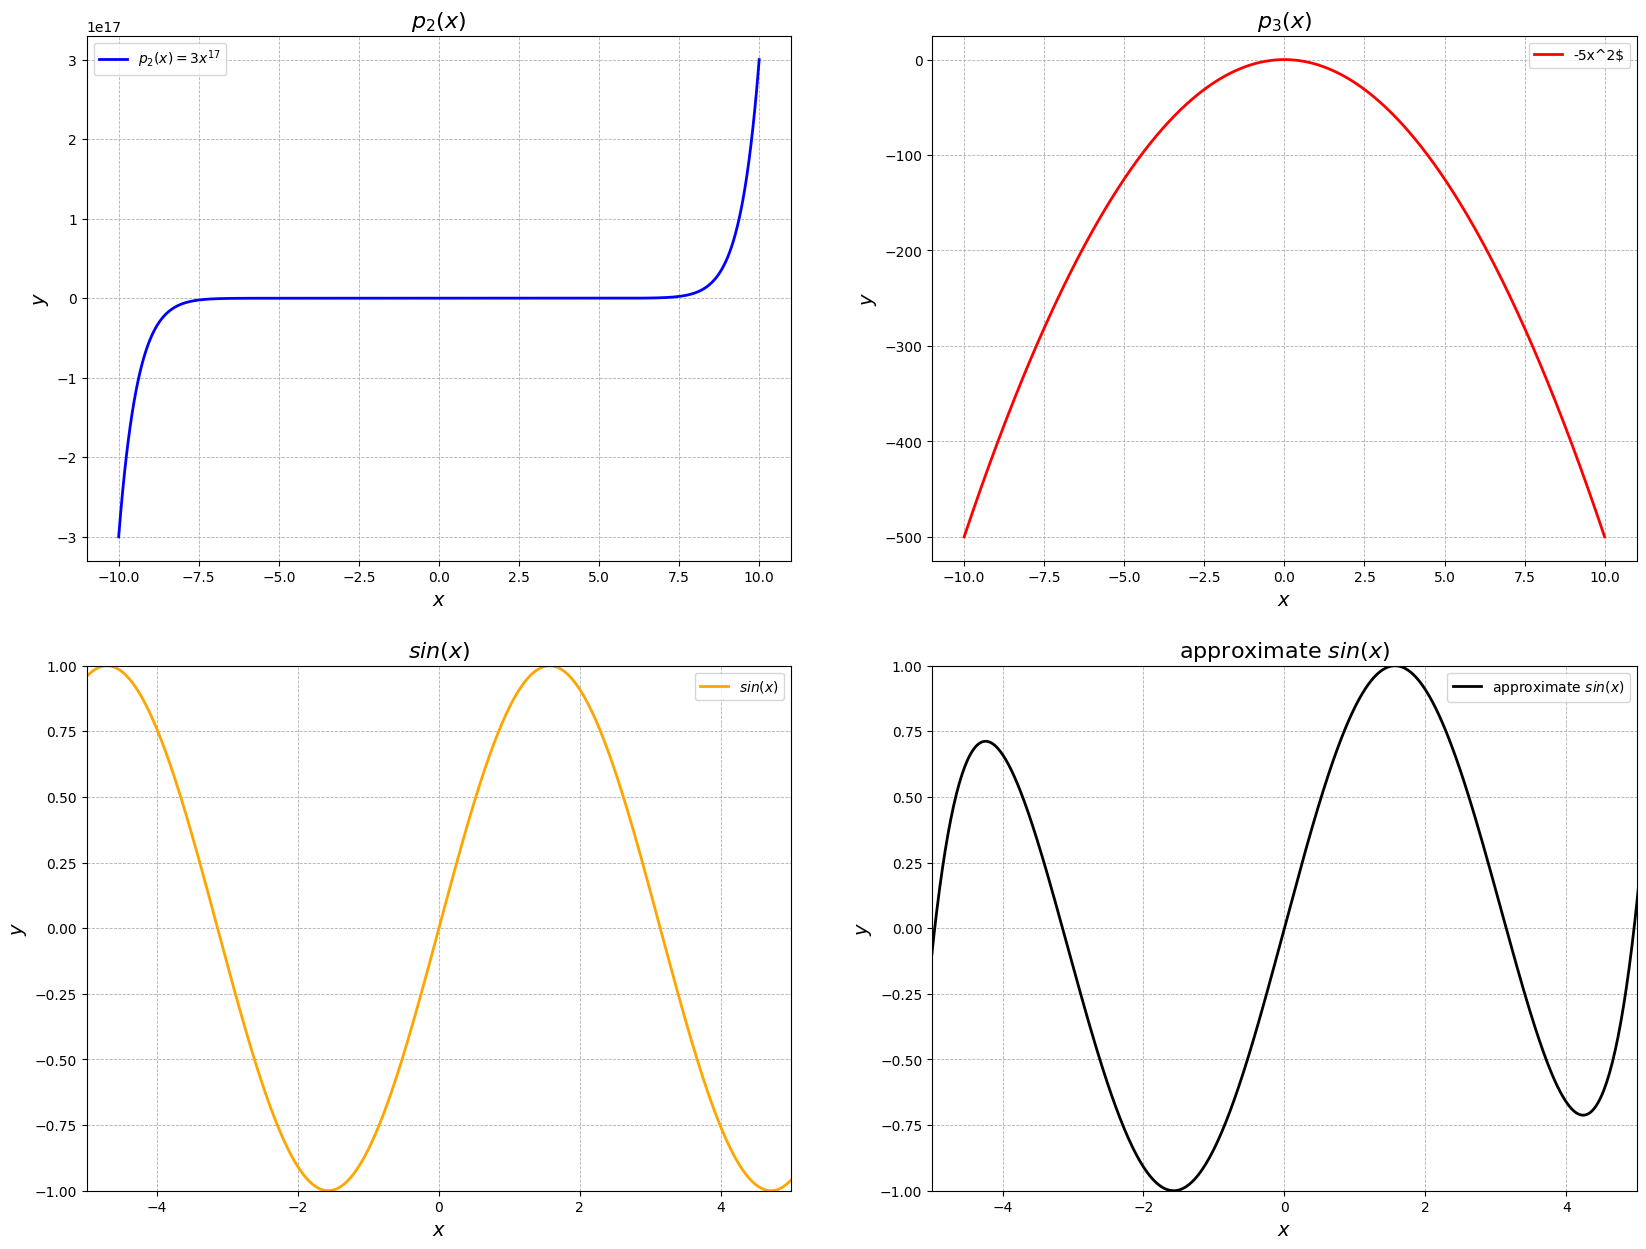

In [23]:
plt.figure(figsize=(20, 15))

# plot p2(x)
plt.subplot(2, 2, 1)
plt.title("$p_2(x)$", fontsize=16)
plt.plot(x.cpu().numpy(), p2.cpu().numpy(), linestyle='-', color='blue', linewidth=2, label="$p_2(x)=3x^{17}$")
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid(linestyle='--', linewidth=0.6)
plt.legend()


# plot p3(x)
plt.subplot(2, 2, 2)
plt.title("$p_3(x)$", fontsize=16)
plt.plot(x.cpu().numpy(), p3.cpu().numpy(), linestyle='-', color='red', linewidth=2, label="-5x^2$")
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid(linestyle='--', linewidth=0.6)
plt.legend()


# plot orginal sin(x)
plt.subplot(2, 2, 3)
plt.title("$sin(x)$", fontsize=16)
plt.plot(x.cpu().numpy(), torch.sin(x).cpu().numpy(), linestyle='-', color='orange', linewidth=2, label="$sin(x)$")
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.xlim([-5, 5])
plt.ylim([-1, 1])
plt.grid(linestyle='--', linewidth=0.6)
plt.legend()


# plot approximate sin(x)
plt.subplot(2, 2, 4)
plt.title("approximate $sin(x)$", fontsize=16)
plt.plot(x.cpu().numpy(), p1.cpu().numpy(), linestyle='-', color='black', linewidth=2, label="approximate $sin(x)$")
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.xlim([-5, 5])
plt.ylim([-1, 1])
plt.grid(linestyle='--', linewidth=0.6)
plt.legend()

plt.show()